In [ ]:
from IPython.core.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [1]:
from sys import path; path.insert(1,"../src");
import fubar; from importlib import reload; reload(fubar);

***
< [GMIT Data Analytics](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict) | [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/mls-t-test/blob/main/README.md) >

[![GMIT](https://github.com/SeanOhAileasa/SeanOhAileasa/blob/master/rc/gmit.png?raw=true)](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict)

## Machine Learning & Statistics - Course Material 2021
### Topic: [t-test](https://nbviewer.jupyter.org/github/SeanOhAileasa/mls-t-test/blob/main/mls-t-test.ipynb)
***

Course material for the ``Machine Learning & Statistics`` module (5 Credits) of the ``Higher Diploma in Science in Computing (Data Analytics) (H.Dip)`` programme (75 Credits) at **Galway-Mayo Institute of Technology (GMIT)**.

- referenced external link - [Machine Learning & Statistics](https://nbviewer.jupyter.org/github/SeanOhAileasa/mls-machine-learning-statistics/blob/main/mls-machine-learning-statistics.ipynb)

In [2]:
from sys import path; path.insert(1,"../src")
from fubar import fFile,fMagic

In [3]:
%%script bash
grep -1 "def fFile" ../src/fubar.py -A 9

# repository ./SeanOhAileasa
def fFile(nParPath):
    """Start a file with its associated application.

Input: nParPath
Process: (os.path.realpath; os.startfile)
Output: file opened with associated application
"""
    from os import path,startfile
    return startfile(path.realpath(nParPath))
# --- END ---


<a id="top"></a>
***
## Table of Contents
***

## [Abstract](#abstract)

## [Introduction](#introduction) 

* [Simulation](#simulation) <br/><br/>
    * [Collections](#simulationnumpyrandomnormalFakeData) ``a`` ``b`` <br/><br/>
        * [Data Structure](#dataStructure) <br/><br/>
            * [Visualisation](#dataStructurevisualisation)

## [Solution](#solution)

* [T-Test](#solutionttest) <br/><br/>
    * [``scipy.stats``](#solutionscipystats) <br/><br/>
    * [``statsmodels.stats.weightstats``](#solutionstatsmodelsstatsweightstats)

## [Conclusion](#conclusion)

- &#x1F6A7;

In [ ]:
# fFile("./hide/01-t-tests in Python setup - 18-10-2020.mp4")
# fFile("./hide/02-Simulating data for a t-test - 18-10-2020.mp4")
# fFile("./hide/03-Running a t-test in Python - 18-10-2020.mp4")

***
## END

< [Table of Contents](#top) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="abstract"></a>
***
## Abstract
***

- in comparison to machine learning the ``t-test`` is an old-style statistical test - there is an interesting relationship between the ``t-test`` and Ireland - William Sealy Gosset figured out a way to test if two sets of numbers are similar [1]

- the technique is a traditional way of looking at the world and trying to make predictions based on data - even though it is the older approach many think it is still the better approach (machine learning practitioners may not know much about these old older methods) [1]

- the ``t-test`` is heavily used in the life/medical/physical sciences and provides a grounding in the ideas around machine learning [1]

- thinking about uncertainty in the world and datasets that have a pattern in them - that pattern may have a little bit of variability and a little bit of volatility (not a straightforward pattern) [1]

- there is a lot of theory behind ``t-tests`` (probability distributions and formulating hypothesis tests etc) - demonstrating the ``t-test`` from a computer science point of view [1]

- ``scipy.stats.ttest_ind`` is literally performing a ``t-test`` (passing arguments ``a`` and ``b``) [1]

```python
scipy.stats.ttest_ind(a,b)
```

- there is a little bit of preparation for the two inputs (``a`` and ``b``) but the preparation is really just unravelling those because all ``a`` is a collection of numbers and all ``b`` is a collection of numbers [1]

- the point is it is very easy to run statistical tests when you know a little bit of programming - many organisations spend a lot of money on ``SPSS`` and the main thing its used for is to run something like ``stat.ttest_ind(a,b)`` (in python) and get the exact same output [1]

- running machine learning code is fairly straightforward whereby a single statement actually does the heavy lifting - digging into a package to do the calculation is straightforward - could easily code up a ``t-test`` function but the interpretation of the outputs is where it is at [1]

- what is assumed before doing the test and how the assumptions are justified (running the machine learning code statement) then comes the interpretation of the results coming out of that test [1]

- generally speaking will get essentially two numbers in the output: i. the calculation of the actual ``t-statistic`` and; ii. some probability related to that value saying how likely it was to see that value based on the prior assumptions [1]

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="introduction"></a>
***
## Introduction
***

- a ``t-test`` is a statistical test that looks for differences in two collections of numbers - asks did the two collections come from what looks like the same probability distribution (checking if two collections came from populations that have the same average) [1]

< [Table of Contents](#top) | [References](#references) >
<a id="simulation"></a>
***
### Simulation
***

- generating two collections of random numbers [2]

- ``m_a`` and ``m_b`` represents the mean of each collection of random numbers generated [2]

In [1]:
m_a,m_b=1.0,2.0

- ``s_a`` and ``s_b`` (technically not quite right) represents the standard deviation [2]

In [2]:
s_a,s_b=0.4,0.4

- ``N`` is just a convenience parameter thrown in [2]

In [3]:
N=40 # representing collection len

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandomnormalFakeData"></a>
***
###### Collections ``a`` ``b``
***

- creating collections ``a`` and ``b`` - both are just collections of numbers wrapped in ``numpy`` arrays - takes the collection of numbers and makes them another collection of numbers with all the ``numpy`` functionality [2]

In [4]:
import numpy as np

- the numbers are the same but the ``numpy`` arrays produced are more efficient than the bog-standard collection from python [2]

- ``numpy.random.normal`` is going to generate random numbers on a bell-shaped curve [2]

- specifying the mean ``m_a`` (and ``m_b``) picks a number that comes out with an average around the mean location (``loc``) - generates a collection of numbers centred around $1.0$ [2]

In [5]:
m_a

1.0

In [6]:
m_b # collection centered around

2.0

- the ``scale`` basically means the spread according to ``s_a`` (and ``s_b``) - generally means ``s_a`` is unlikely to generate numbers bigger than $2.5$ and smaller than $-0.5$ (with total $40$) [2]

In [7]:
N # len of collection

40

In [8]:
s_a

0.4

In [9]:
a=np.random.normal(loc=m_a,scale=s_a,size=N)

In [10]:
a

array([1.68336002, 0.92047464, 1.25790861, 1.39770799, 1.15505739,
       1.18430275, 0.53412228, 0.87737711, 0.78765111, 0.49509225,
       1.16000176, 1.10202768, 0.84078774, 1.60395551, 1.14317434,
       0.87661443, 1.07703359, 0.50488553, 1.36079456, 1.23979521,
       0.73615406, 1.2004342 , 1.10192825, 0.94925617, 0.69442526,
       1.05841434, 1.44137751, 1.46805263, 1.64355588, 0.6033123 ,
       0.86563308, 0.91408095, 0.81797915, 1.15552642, 0.94365452,
       1.05938938, 0.90787745, 1.95434413, 0.88131201, 1.49407912])

In [11]:
s_b

0.4

In [12]:
b=np.random.normal(loc=m_b,scale=s_b,size=N)

In [13]:
b

array([1.60298475, 2.04607398, 2.58947921, 2.46713238, 2.36114303,
       1.1738508 , 2.29387779, 1.53600869, 2.15383097, 1.67102934,
       2.00281029, 1.80152964, 1.95493647, 2.10615356, 2.57176633,
       1.98097058, 1.80052597, 2.24514741, 1.60137134, 1.84082464,
       1.91102209, 1.44652569, 1.31959609, 1.87651697, 1.72029857,
       1.84707788, 2.33464662, 2.15459645, 1.63960723, 2.87920532,
       1.92457822, 2.65492158, 2.42636242, 1.95611558, 2.43806852,
       1.75105889, 1.90455745, 2.18807571, 2.4725368 , 2.05198765])

< [Table of Contents](#top) | [References](#references) >
<a id="dataStructure"></a>
***
###### Data Structure
***

- creating a data structure built from the ``numpy`` collection - using ``pandas`` allows different types for the columns (an abstraction on top of ``numpy``) [1]

In [14]:
import pandas as pd

- creating a ``DataFrame`` of the ``a`` and ``b`` collections [2] 

- ``A`` is going to be in the column beside the ``a`` collection - ``B`` is going to be in the column beside the ``b`` collection [2]

- the ``a`` collection is meant to be centred around $1.0$ (beside the column called Category ``A``) - the ``b`` collection is meant to be centred around $2.0$ (beside the column called Category ``B``) [2]

In [15]:
df=pd.DataFrame(data={"Category":["A"]*len(a)+["B"]*len(b),"Value":np.hstack([a,b])})

In [16]:
df

,Category,Value
0,A,1.683360
1,A,0.920475
2,A,1.257909
3,A,1.397708
4,A,1.155057
...,...,...
75,B,1.751059
76,B,1.904557
77,B,2.188076
78,B,2.472537


< [Table of Contents](#top) | [References](#references) >
<a id="dataStructurevisualisation"></a>
***
###### Visualisation
***

- getting a picture of whats going on [2]

In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.style.use(style="fivethirtyeight")

In [19]:
import seaborn as sns

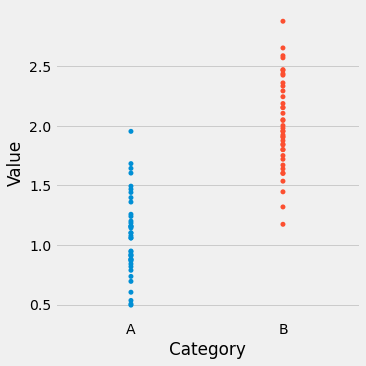

In [20]:
sns.catplot(x="Category",y="Value",jitter=False,data=df);

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Conclusion](#conclusion) | [References](#references) >
<a id="solution"></a>
***
## Solution
***

- the simulation games the system (knowing the collection ``a`` is grouped around the ``m_a`` and the collection ``b`` is grouped around ``m_b``) [3]

- in the real-world may have measurements for the collection ``a`` and more measurements for the collection ``b`` but not know if both are grouped around separate points [3]

- the question is does the collections (``a`` and ``b``) differ in general enough to justify saying the collection ``a`` is different to the collection ``b`` [3]

< [Table of Contents](#top) | [References](#references) >
<a id="solutionttest"></a>
***
### T-Test
***

- the ``t-test`` is actually testing what is the probability that the distribution from which the two generated collections had the same mean [3]

- two different methods: i. ``scipy.stats`` and; ii. ``statsmodels.stats.weightstats`` [3]

< [Table of Contents](#top) | [References](#references) >
<a id="solutionscipystats"></a>
***
###### ``scipy.stats``
***

In [21]:
import scipy.stats as ss

- returning the ``p-value`` from ``scipy.stats.ttest_ind`` [3]

- function ``ttest_ind`` is asking what is the probability (based on a few assumptions) that the numbers in the collection ``a`` and the numbers in the collection ``b`` had an underlying distribution in which both had the same average value [3]

- testing if there is sufficient evidence that the values in ``a`` and ``b`` are grouped around the same point (simulation is gamed so that this is not the case) [3]

In [22]:
t_ss,p_ss=ss.ttest_ind(a=a,b=b)

- probability of approximately zero returned - typically use a ``p-value`` cutoff of $0.05$ (5% chance of making the wrong decision) [3]

In [23]:
print(f"{p_ss:0.2f}")

0.00


- the ``t-test`` is suggesting there is almost a 0% chance (zero probability) that the numbers in the collection ``a`` and the collection ``b`` are grouped around the same point on the y-axis [3]

- there is sufficient evidence to suggest the numbers in the collection ``a`` are different from the numbers in the collection ``b`` (specifically the mean of the distribution they came from) [3]

- can identify the numbers in both collections (``a`` and ``b``) are different by observing the plot - running the statistical test provide evidence that its reproducibly true [3] 

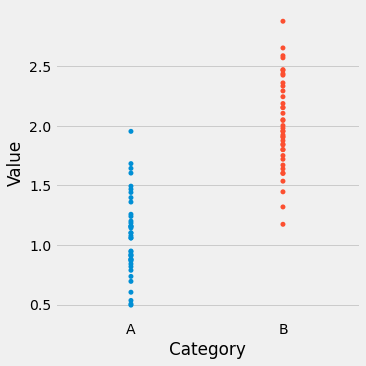

In [24]:
sns.catplot(x="Category",y="Value",jitter=False,data=df);

- now centering the collections (``a`` and ``b``) around the same value [3]

In [25]:
m_a

1.0

In [26]:
m_b=m_a

In [27]:
m_b

1.0

In [28]:
b=np.random.normal(loc=m_b,scale=s_b,size=N) # generate collection b

In [29]:
df=pd.DataFrame(data={"Category":["A"]*len(a)+["B"]*len(b),"Value":np.hstack([a,b])})

- gaming the system by making sure the numbers are both grouped around $1.0$ - on the plot (minds eye) looks like the ``b`` numbers are a little bit higher than the ``a`` numbers but they are not - its just random chance [3]

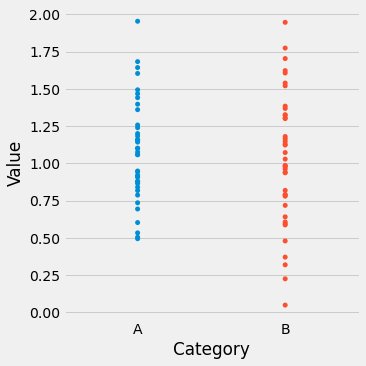

In [30]:
sns.catplot(x="Category",y="Value",jitter=False,data=df);

- now under the assumption that ``a`` and ``b`` are centred around the same point (gamed the system) [3]

In [31]:
t_ss,p_ss=ss.ttest_ind(a=a,b=b)
print(f"{p_ss:0.2f}% probability ({p_ss*10:.0f}% chance)") # typical cutoff 0.05

0.58% probability (6% chance)


- if the typical cutoff is $0.05$ then the statistical test does not provide any evidence they are not centred around same point - no evidence here to suggest that they are not centred around the same point because the output is too high a probability [3] 

< [Table of Contents](#top) | [References](#references) >
<a id="solutionstatsmodelsstatsweightstats"></a>
***
###### ``statsmodels.stats.weightstats``
***

In [32]:
import statsmodels.stats.weightstats as stat

- alternative package returns the same ``p-value`` [3]

In [33]:
t,p,d=stat.ttest_ind(a,b)

In [34]:
print(f"{p:0.2f}% probability ({p*10:.0f}% chance)") # typical cutoff 0.05

0.58% probability (6% chance)


In [35]:
exit()

<!-- - refer [Appendix](#appendix-df) to view the full dataset <a id="go-back-df"></a> -->
<!-- print(fGetModuleType(___x___),fDocumentation(___x___)) -->
***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [References](#references) >
<a id="conclusion"></a>
***
## Conclusion
***

- there is all sorts of problems in statistical tests that are predictable problems and these arise because there is inherence uncertainty in statistical tests [1]

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="references"></a>
***
## References
***
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1] I. McLoughlin, "t-tests in Python setup," GMIT, October 2020.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2] I. McLoughlin, "Simulating data for a t-test," GMIT, October 2020.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3] I. McLoughlin, "Running a t-test in Python," GMIT, October 2020.

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

&#x1F6A7;

***
## END

# END JUPYTER NOTEBOOK